# Lab 1 - Used Cars in the USA
#### By: David Wei, Sophia Wu, Dhruba Dey, Queena Wang

### Business Understanding:
1-2 things we want to predict
Based on type of data we want to predict, categorical/discrete/boolean/etc.

Predict = Price
Categorize = 




In [1]:
!pip install missingno
!pip install plotnine

In [2]:
#importing libraries and reading in file
import pandas as pd
import numpy as np
import warnings
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line
warnings.filterwarnings('ignore') #ignoring warnings

In [3]:
# NOTE: need to change file per user
df_raw = pd.read_csv(r'C:\Users\dey4d\OneDrive\Documents\Pyfolder\used_cars_data.csv')
#df_raw = pd.read_csv('https://raw.githubusercontent.com/chee154/ml-Py-used_cars/main/data/kaggle_used_cars_data.csv')

In [32]:
df_raw.head(5)

,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [5]:
print("Total # of Records: " + str(df_raw.shape[0]))
print("Total # of Columns: " + str(df_raw.shape[1]))

Total # of Records: 3000040
Total # of Columns: 66


### Data Meaning Type

#### Domain based Attribute Reduction
Before we do a deep dive into the types of our data, we will first look into reducing it from a  The total dataset has 66 attributes After a quick observation of the column headers, we can deduce that not all columns will be necessary for our analysis. Reasons for removing them below:

In [40]:
#subsetting columns by referencing the column indexes
df_cln_1 = df_raw.iloc[:, np.r_[0,5,7:11,13:17,18:21,22:30,32,35:38,42:50,51,55:57,61:63,64:66]]
print(df_cln_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000040 entries, 0 to 3000039
Data columns (total 40 columns):
 #   Column                Dtype  
---  ------                -----  
 0   vin                   object 
 1   body_type             object 
 2   city                  object 
 3   city_fuel_economy     float64
 4   combine_fuel_economy  float64
 5   daysonmarket          int64  
 6   engine_cylinders      object 
 7   engine_displacement   float64
 8   engine_type           object 
 9   exterior_color        object 
 10  frame_damaged         object 
 11  franchise_dealer      bool   
 12  franchise_make        object 
 13  fuel_tank_volume      object 
 14  fuel_type             object 
 15  has_accidents         object 
 16  height                object 
 17  highway_fuel_economy  float64
 18  horsepower            float64
 19  interior_color        object 
 20  isCab                 object 
 21  is_new                bool   
 22  length                object 
 23  listed_

### Data Quality

In [6]:
msno.matrix(df_cln_1)

NameError: name 'df_cln_1' is not defined

After doing a quick profiling on some our identified columsn, we can see that both engine_cylinders and engine_type are the same. Additionally, we also found that the prefixes and suffixes attached to them are descriptive of it and thus not a continuous value. 

In [41]:
# removing city_fuel_economy since a quick vizualition of our dataset shows that ALL values are empty
df_cln_1 = df_cln_1.drop(columns='combine_fuel_economy')
print(df_cln_1.shape[1])

39


We also found that 'engine_cylinders','engine_type' contains the same data in two separate columns, so we first test if this condition is true and if it is, we will remove one.

In [42]:
#observing if 'engine_cylinders','engine_type' is the same data
if df_cln_1['engine_cylinders'].equals(df_cln_1['engine_type']) == True:
    df_cln_1 = df_cln_1.drop(columns='engine_cylinders')
    print(df_cln_1.shape[1])

38


We also found additional columns that were simply descriptions of another columns, for example. The 'wheel_system_display' attribute is simply a longer, more descriptive version of the 'wheel_system' attribute ("Front-Wheel Drive" vs "FWD"). For columns that follow this trend, we will remove the descriptive column from our dataset. 

In [43]:
print(df_cln_1[['wheel_system']])
print(df_cln_1[['wheel_system_display']])
df_cln_1 = df_cln_1.drop(columns='wheel_system_display')
print(df_cln_1.shape[1])

        wheel_system
0                FWD
1                AWD
2                AWD
3                AWD
4                AWD
...              ...
3000035          FWD
3000036          FWD
3000037          FWD
3000038          AWD
3000039          FWD

[3000040 rows x 1 columns]
        wheel_system_display
0          Front-Wheel Drive
1            All-Wheel Drive
2            All-Wheel Drive
3            All-Wheel Drive
4            All-Wheel Drive
...                      ...
3000035    Front-Wheel Drive
3000036    Front-Wheel Drive
3000037    Front-Wheel Drive
3000038      All-Wheel Drive
3000039    Front-Wheel Drive

[3000040 rows x 1 columns]
37


We also discussed that 'interior_color' attribute has 45,726 distinct color values and so due to the sheer volume and complexity (since the color attribute is also not consistently 1 color). We also decided to remove it from our dataset since it is unrealistic for the type of modeling we are doing.

In [44]:
print(df_cln_1['interior_color'].nunique())

df_cln_1 = df_cln_1.drop(columns='interior_color')
print(df_cln_1.shape[1])

45726
36


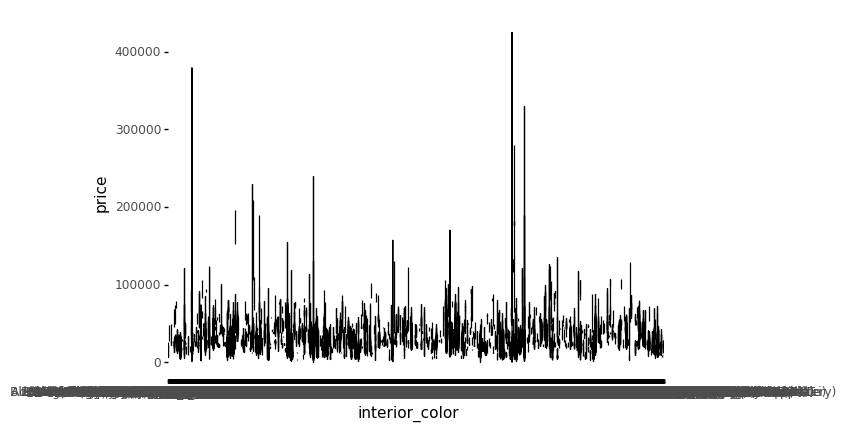

<ggplot: (160544166783)>

In [19]:
#note this plot takes forever to run
(ggplot(df_cln_1)+aes(x="interior_color", y="price")+geom_line())

Another attribute we found that could be removed as the "listed_date" attribute. Since there was no other 'datetype' attributes available in our dataset, we didn't really see a point with keeping it as there was no other data reference to use it with. Additionally, the attribute 'daysonmarket' already pre-aggregated the number of days it took to sell a vehicle, which the listed date would've been used for otherwise. Because of this, we will also remove it from our dataframe.

### Data Cleaning - Missing Data & Nulls
Now that our datatypes have been adjusted. We will work on cleaning up any empty data in our dataset. A quick visualization of our data shows that almost every column has empty values. We will focus on analyzing those that have a large amount of empty data (ex. Frame_Damaged, has_accidents, isCab, etc.)

In [45]:
# remove the missing values
df_cln_2 = df_cln_1.dropna()
print(len(df_cln_2))

697997


In [46]:
# checking the row counts of columns to see the missing rows
df_cln_2.count()

vin                     697997
body_type               697997
city                    697997
city_fuel_economy       697997
daysonmarket            697997
engine_displacement     697997
engine_type             697997
exterior_color          697997
frame_damaged           697997
franchise_dealer        697997
franchise_make          697997
fuel_tank_volume        697997
fuel_type               697997
has_accidents           697997
height                  697997
highway_fuel_economy    697997
horsepower              697997
isCab                   697997
is_new                  697997
length                  697997
listed_date             697997
listing_color           697997
make_name               697997
maximum_seating         697997
mileage                 697997
model_name              697997
owner_count             697997
power                   697997
price                   697997
salvage                 697997
seller_rating           697997
torque                  697997
transmis

<AxesSubplot:>

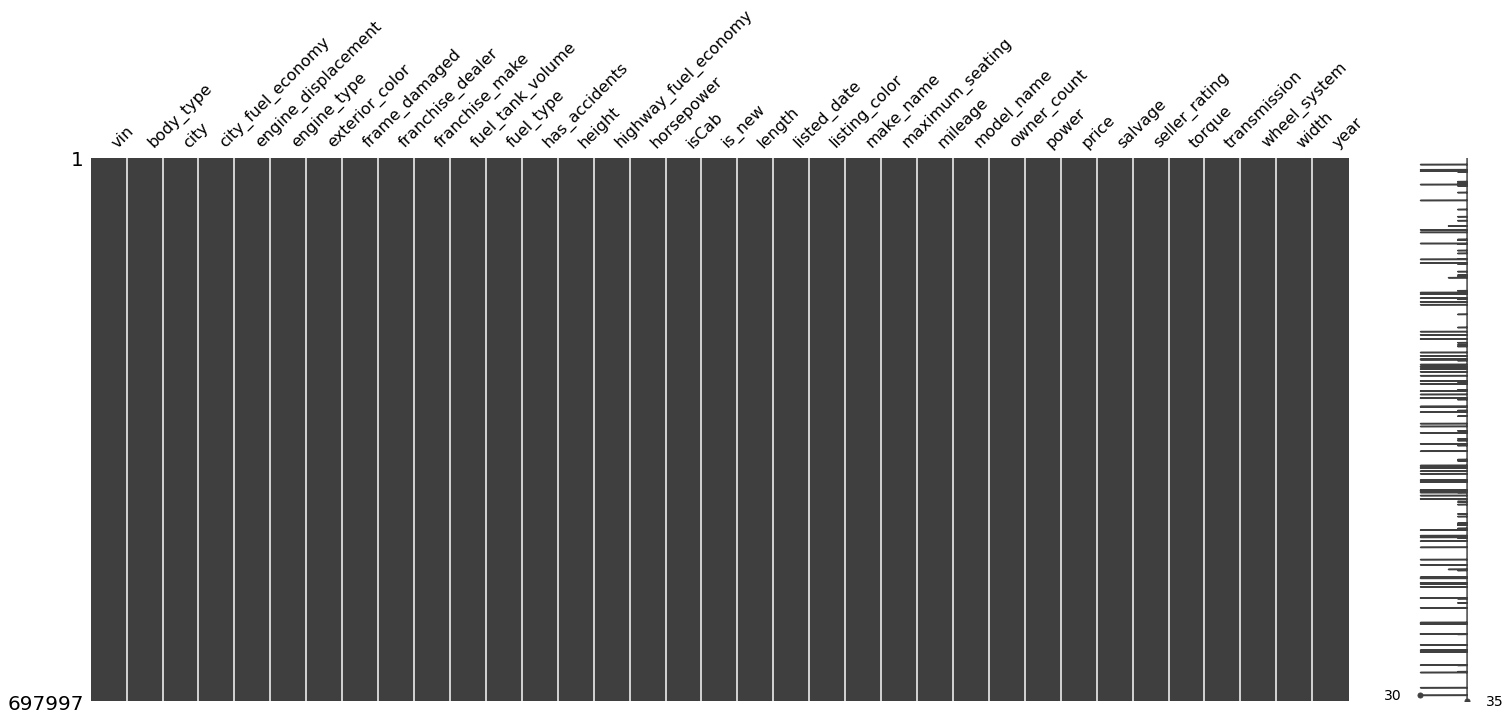

In [38]:
#visualizatin of our data after removing all rows with missing data
msno.matrix(df_cln_2)

In [ ]:
sns.catplot(x="city_fuel_economy", kind="count", data=df_cln_2)

We decided that since our original dataset was large (10gb with 3million records), that instead of imputing data based on the mean or other statistical types, that deleting all records with empty values still returned 700,000 total records that not only provides plenty of data leftover, but also raw data that isn't imputed. 

### Data Cleaning - Datatypes
Obviously at this point we need to convert a few of our data columns to the appropriate data type by removing parts of the value string that we do not need such as "gal" in the ful_tank_volume

In [47]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning = ['engine_type','exterior_color','frame_damaged','franchise_dealer','franchise_make','fuel_tank_volume','fuel_type','has_accidents','height','interior_color','isCab','is_new','length','listed_date','listing_color','make_name','maximum_seating','model_name','power','salvage','torque','transmission','wheel_system','wheel_system_display','width']
for col in columns_that_need_cleaning:
        print(df_cln_2[col].unique())

['I4' 'V6' 'V8' 'H4' 'I6' 'V8 Flex Fuel Vehicle' 'V6 Flex Fuel Vehicle'
 'I5' 'I4 Diesel' 'I4 Flex Fuel Vehicle' 'I4 Hybrid' 'V6 Diesel'
 'I6 Diesel' 'I3' 'W12 Flex Fuel Vehicle' 'V6 Biodiesel' 'V12' 'V10' 'W12'
 'H6' 'H4 Hybrid' 'V6 Hybrid' 'I4 Compressed Natural Gas' 'W16' 'R2'
 'I6 Hybrid' 'V6 Compressed Natural Gas']
['Silver Ice Metallic' 'Black' 'Diamond Black Crystal Pearlcoat' ...
 'VICTORIA BLACK' 'Modern S' 'Cosmic']
[False True]
[ True]
['Chevrolet' 'Jeep' 'Cadillac' 'Chrysler' 'Dodge' 'Kia' 'RAM' 'Mazda'
 'Audi' 'Hyundai' 'Ford' 'Toyota' 'Lincoln' 'Volvo' 'GMC' 'Volkswagen'
 'BMW' 'Lexus' 'Buick' 'Subaru' 'Scion' 'Honda' 'Acura' 'Nissan'
 'INFINITI' 'Porsche' 'Rolls-Royce' 'Lamborghini' 'Bentley'
 'Mercedes-Benz' 'Jaguar' 'Land Rover' 'Maserati' 'Ferrari' 'MINI' 'FIAT'
 'Alfa Romeo' 'Mitsubishi' 'Aston Martin' 'Lotus' 'McLaren' 'SRT'
 'Genesis' 'smart' 'Shelby' 'Pagani']
['15.8 gal' '17.4 gal' '19.4 gal' '22 gal' '24.6 gal' '13.5 gal'
 '13.2 gal' '15.9 gal' '12.7 gal' '22.5

KeyError: 'interior_color'

In [48]:
#finding all unique values per column to see what values we need to clean
columns_that_need_cleaning_2 = ['fuel_tank_volume','height','length','maximum_seating','width',]
for col in columns_that_need_cleaning_2:
        print(df_cln_2[col].unique())

['15.8 gal' '17.4 gal' '19.4 gal' '22 gal' '24.6 gal' '13.5 gal'
 '13.2 gal' '15.9 gal' '12.7 gal' '22.5 gal' '21.5 gal' '18.5 gal'
 '26 gal' '12.4 gal' '19.2 gal' '18.6 gal' '23.2 gal' '24 gal' '16.4 gal'
 '13.7 gal' '19 gal' '14.5 gal' '14 gal' '18 gal' '16.9 gal' '21 gal'
 '19.5 gal' '31 gal' '18.8 gal' '16 gal' '16.6 gal' '21.7 gal' '20 gal'
 '15.3 gal' '22.2 gal' '17.2 gal' '21.1 gal' '16.1 gal' '13 gal'
 '23.8 gal' '17 gal' '15.1 gal' '19.8 gal' '23 gal' '20.5 gal' '11.9 gal'
 '14.2 gal' '14.3 gal' '14.8 gal' '17.7 gal' '16.5 gal' '17.8 gal'
 '15.6 gal' '17.1 gal' '15.5 gal' '10.6 gal' '15.7 gal' '18.1 gal'
 '20.1 gal' '12.8 gal' '20.3 gal' '21.6 gal' '21.9 gal' '11.4 gal'
 '36 gal' '16.8 gal' '15.4 gal' '16.3 gal' '28.3 gal' '17.9 gal'
 '27.7 gal' '13.6 gal' '17.5 gal' '28 gal' '27 gal' '22.4 gal' '20.6 gal'
 '26.4 gal' '11.6 gal' '11.8 gal' '12 gal' '19.3 gal' '13.1 gal'
 '10.8 gal' '14.9 gal' '19.1 gal' '12.1 gal' '27.3 gal' '38 gal'
 '11.3 gal' '32 gal' '10 gal' '23.3 gal' '2

Regarding fuel_tank_volume and maximum_seating, we can see that there appears to be a pattern in the suffixes, "gal" and "seats" accordingly. We will now remove them and then convert all values to numeric.

In [50]:
#removing unecesary string values in columns
#then cleaning up any values that contain '--' and replacing it with NaN
#Lastly, converting the value first to a string type and then to a float type

df_cln_2['fuel_tank_volume']=df_cln_2['fuel_tank_volume'].astype(str).str.replace(' gal', '').replace('--',np.NaN).astype(float)
df_cln_2['height']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['length']=df_cln_2['height'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)
df_cln_2['maximum_seating']=df_cln_2['maximum_seating'].astype(str).str.replace(' seats', '').replace('--',np.NaN).astype(float)
df_cln_2['width']=df_cln_2['width'].astype(str).str.replace(' in', '').replace('--',np.NaN).astype(float)

In [51]:
#doing a quick profile on the subsetted columns
print(df_cln_2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697997 entries, 38 to 3000039
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   697997 non-null  object 
 1   body_type             697997 non-null  object 
 2   city                  697997 non-null  object 
 3   city_fuel_economy     697997 non-null  float64
 4   daysonmarket          697997 non-null  int64  
 5   engine_displacement   697997 non-null  float64
 6   engine_type           697997 non-null  object 
 7   exterior_color        697997 non-null  object 
 8   frame_damaged         697997 non-null  object 
 9   franchise_dealer      697997 non-null  bool   
 10  franchise_make        697997 non-null  object 
 11  fuel_tank_volume      697827 non-null  float64
 12  fuel_type             697997 non-null  object 
 13  has_accidents         697997 non-null  object 
 14  height                697890 non-null  float64
 15

We can now see that all of our column values have been adjusted to the correct datatypes. We will next proceed with cleaning up the remainder of our data. 

In [53]:
df_final = df_cln_2.iloc[:, np.r_[1,3,4,5,13,15,16,18,23,24,26,28,30]]
print(df_final.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 697997 entries, 38 to 3000039
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   body_type             697997 non-null  object 
 1   city_fuel_economy     697997 non-null  float64
 2   daysonmarket          697997 non-null  int64  
 3   engine_displacement   697997 non-null  float64
 4   has_accidents         697997 non-null  object 
 5   highway_fuel_economy  697997 non-null  float64
 6   horsepower            697997 non-null  float64
 7   is_new                697997 non-null  bool   
 8   maximum_seating       697892 non-null  float64
 9   mileage               697997 non-null  float64
 10  owner_count           697997 non-null  float64
 11  price                 697997 non-null  float64
 12  seller_rating         697997 non-null  float64
dtypes: bool(1), float64(9), int64(1), object(2)
memory usage: 69.9+ MB
None


# Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

### we are using price (for regression), has_accidents(for logistic regression) and body_type(for multiclass classifications) as the response variables. In this section, we will try to find some interesting relations involving these features. 

has-accidents and is_new are two booleans variables in our final dataset. We could have either or these these two values for the binary classification. But has_accidents feature is more balanced (false: 87% and true:13%) than that of is_new. That is the another driver, besides what is stated in the Business Understanding section, why we leaned on has_accidents for the binary response variable. However, we could have used is_new for the response variable. In that case, we should downscale or upscale, though the downscaling is preferred, training data, which would be an additional step. 

In [24]:
print('--attribute counts of is_new--')
print(df_final['is_new'].value_counts())

print('--attribute counts of has_accidents--')
print(df_final['has_accidents'].value_counts())

--attribute counts of is_new--
False    697330
True        667
Name: is_new, dtype: int64
--attribute counts of has_accidents--
False    613288
True      84709
Name: has_accidents, dtype: int64


One may think the drivers of Sendan, Minivan or wagon may be more cautious that those who drive SUV or Pickup Truck. But at least based on used car market as presented in this visual, there is not much difference in the driving behavior amoung drives of different body types. However, the drivers of coupe and convertible exhibit restriant while on the road because the damage of their vehicle would cost them dearly.

[Text(0, 0, 'Sedan'),
 Text(0, 0, 'Coupe'),
 Text(0, 0, 'SUV / Crossover'),
 Text(0, 0, 'Pickup Truck'),
 Text(0, 0, 'Wagon'),
 Text(0, 0, 'Minivan'),
 Text(0, 0, 'Convertible'),
 Text(0, 0, 'Hatchback'),
 Text(0, 0, 'Van')]

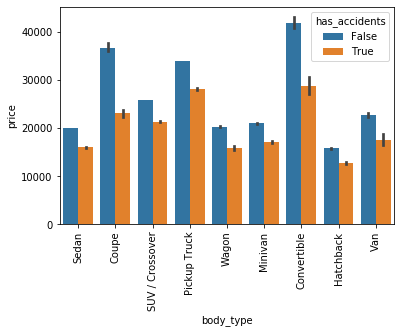

In [33]:
Price_bodytype_accidents = sns.barplot(x="body_type", y="price", hue = "has_accidents",data=df_final)
Price_bodytype_accidents.set_xticklabels(Price_bodytype_accidents.get_xticklabels(), rotation=90)

Coupe, SUV/Crossover, Convertible and Sedan have many outliers, whereas Wagon, Minivan and Vad do not have any outlier. In median used car price of 9 body types are with a close band. 

[Text(0, 0, 'Sedan'),
 Text(0, 0, 'Coupe'),
 Text(0, 0, 'SUV / Crossover'),
 Text(0, 0, 'Pickup Truck'),
 Text(0, 0, 'Wagon'),
 Text(0, 0, 'Minivan'),
 Text(0, 0, 'Convertible'),
 Text(0, 0, 'Hatchback'),
 Text(0, 0, 'Van')]

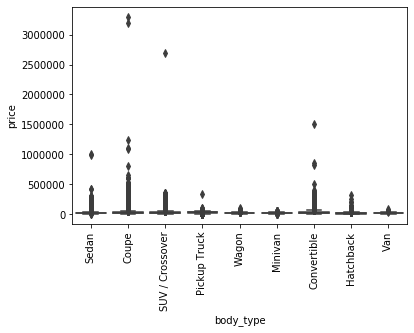

In [39]:
Price_bodytype = sns.boxplot(x="body_type", y="price", data=df_final)
Price_bodytype.set_xticklabels(Price_bodytype.get_xticklabels(), rotation=90)

Sedan, SUV/Crossover, Pickup Truck stay in the market much loger than Coupe, Wagon and Hackback do. It is surprise to see that Coupe, though it is an expensive category car, sells faster Sedan, which we believe a common people's car. Most likely supply demand or mispricing is causing this anamoly. 

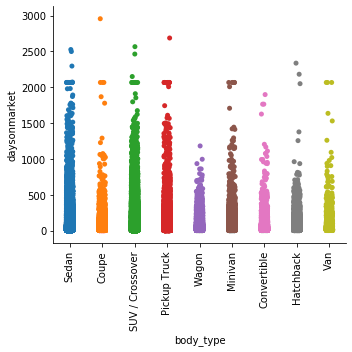

In [57]:
plot = sns.catplot(x="body_type", y="daysonmarket", data=df_final)
for axes in plot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()

The lower the mileage, the higher the price, and that goes with the general notion. However, the relation breaks when the mileage goes beyond 50k as the price does not vary much from that point. 

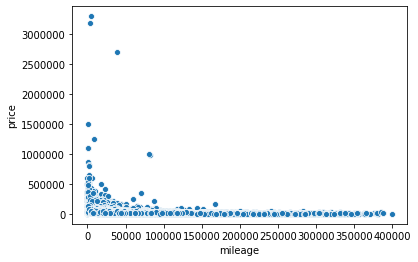

In [62]:
plt2 = sns.scatterplot(data=df_final, x="mileage", y="price", palette="deep")

We may think that the used cars having accidents will stay longer in the market, but that is not the case with an exception of Van. 

[Text(0, 0, 'Sedan'),
 Text(0, 0, 'Coupe'),
 Text(0, 0, 'SUV / Crossover'),
 Text(0, 0, 'Pickup Truck'),
 Text(0, 0, 'Wagon'),
 Text(0, 0, 'Minivan'),
 Text(0, 0, 'Convertible'),
 Text(0, 0, 'Hatchback'),
 Text(0, 0, 'Van')]

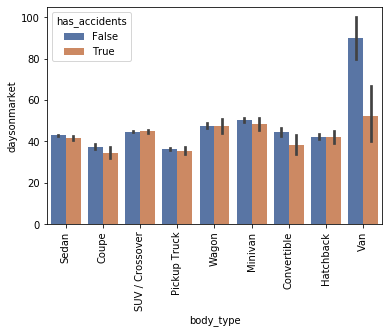

In [71]:
Plt3 = sns.barplot(x="body_type", y="daysonmarket", hue = "has_accidents", palette="deep",data=df_final)
Plt3.set_xticklabels(Plt3.get_xticklabels(), rotation=90)

### Simple Statistics

### Visualize Attributes

### Explore Joint Attributes

### Explore Attributes and Class

### New Features

### Exceptional Work